# Setup Environment


In [1]:
!pip install transformers pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 3.7 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 111.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 30.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 113.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18

In [ ]:
!pip install --upgrade pandas numpy matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 116.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 127.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.5
    Uninstalling matplotlib-3.7.5:
      Successfully uninstalled matplotlib-3.7.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pycaret 3.3.2 requires matplotlib<3.8.0, but you have matplotlib 3.10.1 which is incompatible.
pycaret 3.3.2 requires numpy<1.27,>=1.21, but you have numpy 2.2.5 which is incompatible.
pycaret 3.3.2 requires pandas<2.2.0, but you have pandas 2.2.3 which is incompatibl

In [1]:
import numpy as np
import pandas as pd
import pycaret
import transformers
from transformers import AutoModel, BertTokenizerFast
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import torch
import torch.nn as nn

device = torch.device("cuda")

# Loading the Data

In [2]:
# Loading the Data
true_data = pd.read_csv('True.csv')
fake_data = pd.read_csv('Fake.csv')

In [3]:
# Generate labels True/Fake under a new "Target" columns in the dataframes
true_data['target'] = ['True']*len(true_data)
fake_data['target'] = ['Fake']*len(fake_data)

In [4]:
# Merge the two dataframs by randomly mixing them into a single df
df = pd.concat([true_data, fake_data], ignore_index=True).sample(frac=1).reset_index(drop=True)
print(df.shape)
df.head()

(44898, 5)


,title,text,subject,date,target
0,"Trump Considering David Petraeus, Who Leaked ...",If Donald Trump picked retired General David P...,News,"November 18, 2016",Fake
1,BRILLIANT! LT COL TONY SHAFFER: How Trump Shou...,Former CIA analyst and retired U.S. Army Reser...,left-news,"May 17, 2017",Fake
2,WATCH: JUDGE JEANINE Is FURIOUS After It’s Rev...,Former House of Representatives member and Cha...,left-news,"Oct 29, 2017",Fake
3,Boeing says current Air Force One contract wor...,"SIMI VALLEY, Calif. (Reuters) - Boeing Co on T...",politicsNews,"December 6, 2016",True
4,Trump’s Flip-Flop: Now He’s Complaining That ...,Donald Trump appears to be backing off on his ...,News,"June 26, 2016",Fake


In [5]:
# Convert the string label values 'True/Fake' into numeric values 0/1 (Fake = 1)
df['label'] = pd.get_dummies(df.target)['Fake'].astype(int)

In [6]:
df.head()

,title,text,subject,date,target,label
0,"Trump Considering David Petraeus, Who Leaked ...",If Donald Trump picked retired General David P...,News,"November 18, 2016",Fake,1
1,BRILLIANT! LT COL TONY SHAFFER: How Trump Shou...,Former CIA analyst and retired U.S. Army Reser...,left-news,"May 17, 2017",Fake,1
2,WATCH: JUDGE JEANINE Is FURIOUS After It’s Rev...,Former House of Representatives member and Cha...,left-news,"Oct 29, 2017",Fake,1
3,Boeing says current Air Force One contract wor...,"SIMI VALLEY, Calif. (Reuters) - Boeing Co on T...",politicsNews,"December 6, 2016",True,0
4,Trump’s Flip-Flop: Now He’s Complaining That ...,Donald Trump appears to be backing off on his ...,News,"June 26, 2016",Fake,1


([<matplotlib.patches.Wedge at 0x78c23b6d8310>,
 [Text(-1.1968727067385088, -0.0865778485782335, 'Fake'),
  Text(1.1968726986325005, 0.08657796063754254, 'True')],
 [Text(-0.6981757455974634, -0.05050374500396954, '52.3%'),
  Text(0.6981757408689586, 0.05050381037189981, '47.7%')])

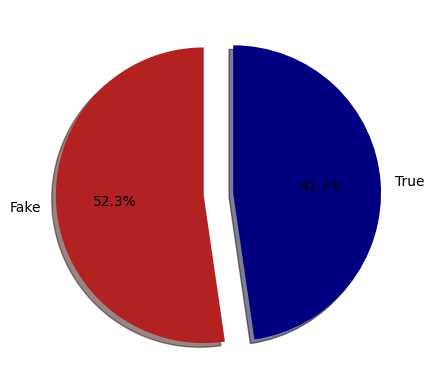

In [7]:
# Check if the data is well balanced
label_size = [df['label'].sum(),len(df['label'])-df['label'].sum()]
plt.pie(label_size, explode = [0.1, 0.1], colors=['firebrick', 'navy'], startangle=90, shadow=True, labels=['Fake', 'True'], autopct="%1.1f%%")

# Train-Test Split

In [8]:
# Train-Validation-Test split into 70:15:15 ratio
# Train-Temp split
train_text, temp_text, train_labels, temp_labels = train_test_split(df['title'], df['label'], random_state=2018, test_size=0.3, stratify=df['target'])

# Validation-Test split
val_text, test_text, val_labels, test_labels = train_test_split(temp_text, temp_labels, random_state=2018, test_size=0.5, stratify=temp_labels)

# BERT Fine-Tuning

### Load pretrained BERT Model

In [9]:
# Load BERT model and tokenizer via HuggingFace Transformers
bert = AutoModel.from_pretrained('bert-base-uncased')
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

### Prepare Input Data

Text(0, 0.5, 'Number of texts')

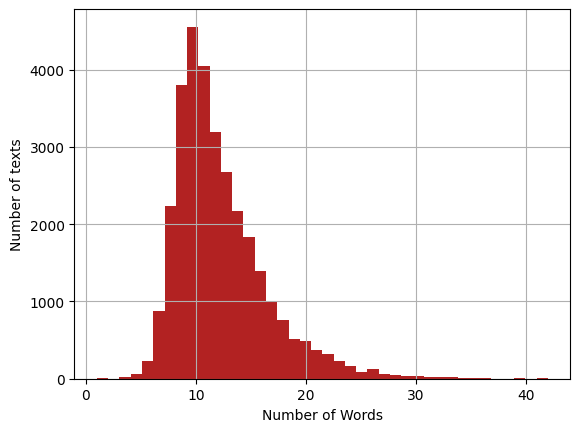

In [10]:
# Plot Histogram of the number of words in the train data 'title'
seq_len = [len(title.split()) for title in train_text]

pd.Series(seq_len).hist(bins = 40, color='firebrick')
plt.xlabel('Number of Words')
plt.ylabel('Number of texts')

In [11]:
# BERT Tokenizer Functionality
sample_data = ["Build Fake news model.", "Using bert."]   # sample data
tokenized_sampled_data = tokenizer.batch_encode_plus(sample_data, padding=True)   #encode text

print(tokenized_sampled_data)

{'input_ids': [[101, 3857, 8275, 2739, 2944, 1012, 102], [101, 2478, 14324, 1012, 102, 0, 0]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 0, 0]]}


In [12]:
# Majority titles above have word length under 15. So, we set the max title length at 15
MAX_LENGTH = 15

# Tokenize and encode sequences int he train set
tokens_train = tokenizer.batch_encode_plus(
    train_text.tolist(),
    max_length = MAX_LENGTH,
    padding = 'max_length',
    truncation = True
)

# Tokenize and encode sequences in the validation set
tokens_val = tokenizer.batch_encode_plus(
    val_text.tolist(),
    max_length = MAX_LENGTH,
    padding = 'max_length',
    truncation = True
)

# Tokenize and encode sequences in the test set
tokens_test = tokenizer.batch_encode_plus(
    test_text.tolist(),
    max_length = MAX_LENGTH,
    padding = 'max_length',
    truncation = True
)

In [13]:
# Convert lists to tensors
train_seq = torch.tensor(tokens_train['input_ids'])
train_mask = torch.tensor(tokens_train['attention_mask'])
train_y = torch.tensor(train_labels.tolist())

val_seq = torch.tensor(tokens_val['input_ids'])
val_mask = torch.tensor(tokens_val['attention_mask'])
val_y = torch.tensor(val_labels.tolist())

test_seq = torch.tensor(tokens_test['input_ids'])
test_mask = torch.tensor(tokens_test['attention_mask'])
test_y = torch.tensor(test_labels.tolist())

In [14]:
# Data Loader Structure definition
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
batch_size = 32                                                       # define a batch size

train_data = TensorDataset(train_seq, train_mask, train_y)            # wrap tensors
train_sampler = RandomSampler(train_data)                             # sampler for sampling data during training
train_dataloader = DataLoader(train_data, sampler = train_sampler, batch_size = batch_size)# dataLoader for train set

val_data = TensorDataset(val_seq, val_mask, val_y)            # wrap tensors
val_sampler = RandomSampler(val_data)                             # sampler for sampling data during training
val_dataloader = DataLoader(val_data, sampler = val_sampler, batch_size = batch_size)# dataLoader for validation set

### Freeze Layers

In [15]:
# Freezing the parameters and defining trainable BERT structure
for param in bert.parameters():
  param.requires_grad = False

### Define Model Architecture

In [16]:
class BERT_Arch(nn.Module):
  def __init__(self, bert):
    super(BERT_Arch, self).__init__()
    self.bert = bert
    self.dropout = nn.Dropout(0.1)        # dropout layer
    self.relu = nn.ReLU()                 # relu activatoin function
    self.fc1 = nn.Linear(768,512)         # dense layer 1
    self.fc2 = nn.Linear(512, 2)          # dense layer 2 (Output Layer)
    self.softmax = nn.LogSoftmax(dim=1)   # softmax activation function

  def forward(self, sent_id, mask):       # define the forward pass
    cls_hs = self.bert(sent_id, attention_mask = mask)['pooler_output']
                                          # pass the inputs to the model
    x = self.fc1(cls_hs)
    x = self.relu(x)
    x = self.dropout(x)
    x = self.fc2(x)                       # output layer
    x = self.softmax(x)                   # apply softmax activation
    return x

model = BERT_Arch(bert)
# Defining the hyperparameters (optimizer, weights of the classes and the epochs)
# Define the optimizer
from torch.optim import AdamW
optimizer = AdamW(model.parameters(), lr = 1e-5)  # learning rate

# Define the loss function
cross_entropy = nn.NLLLoss()

# Number of training epochs
epochs = 4

### Define Train and Evaluation Function

In [17]:
# Defining training and evaluation functions
def train():
  model.train()
  total_loss, total_accuracy = 0, 0

  for step,batch in enumerate(train_dataloader):                # iterate over batches
    if step % 50 == 0 and not step == 0:                        # progress update after every 50 batches.
      print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(train_dataloader)))
    batch = [r for r in batch]                                  # push the batch to gpu
    sent_id, mask, labels = batch
    model.zero_grad()                                           # clear previously calculated gradients
    preds = model(sent_id, mask)                                # get model predictions for current batch
    loss = cross_entropy(preds, labels)                         # compute loss between actual & predicted values
    total_loss = total_loss + loss.item()                       # add on to the total loss
    loss.backward()                                             # backward pass to calculate the gradients
    torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)     # clip gradients to 1.0. It helps in preventing exploding gradient problem
    optimizer.step()                                            # update parameters
    preds=preds.detach().cpu().numpy()                          # model predictions are stored on GPU. So, push it to CPU

  avg_loss = total_loss / len(train_dataloader)                 # compute training loss of the epoch
                                                                # reshape predictions in form of (# samples, # classes)
  return avg_loss                                 # returns the loss and predictions

def evaluate():
  print("\nEvaluating...")
  model.eval()                                    # Deactivate dropout layers
  total_loss, total_accuracy = 0, 0
  for step,batch in enumerate(val_dataloader):    # Iterate over batches
    if step % 50 == 0 and not step == 0:          # Progress update every 50 batches.
                                                  # Calculate elapsed time in minutes.
                                                  # Elapsed = format_time(time.time() - t0)
      print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(val_dataloader)))
                                                  # Report progress
    batch = [t for t in batch]                    # Push the batch to GPU
    sent_id, mask, labels = batch
    with torch.no_grad():                         # Deactivate autograd
      preds = model(sent_id, mask)                # Model predictions
      loss = cross_entropy(preds,labels)          # Compute the validation loss between actual and predicted values
      total_loss = total_loss + loss.item()
      preds = preds.detach().cpu().numpy()
  avg_loss = total_loss / len(val_dataloader)         # compute the validation loss of the epoch
  return avg_loss

### Model Training

In [18]:
# Train and predict
best_valid_loss = float('inf')
train_losses=[]                   # empty lists to store training and validation loss of each epoch
valid_losses=[]

for epoch in range(epochs):
    print('\n Epoch {:} / {:}'.format(epoch + 1, epochs))
    train_loss = train()                       # train model
    valid_loss = evaluate()                    # evaluate model
    if valid_loss < best_valid_loss:              # save the best model
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'model.pt')
    train_losses.append(train_loss)               # append training and validation loss
    valid_losses.append(valid_loss)

    print(f'\nTraining Loss: {train_loss:.3f}')
    print(f'Validation Loss: {valid_loss:.3f}')


 Epoch 1 / 4
  Batch    50  of    983.
  Batch   100  of    983.
  Batch   150  of    983.
  Batch   200  of    983.
  Batch   250  of    983.
  Batch   300  of    983.
  Batch   350  of    983.
  Batch   400  of    983.
  Batch   450  of    983.
  Batch   500  of    983.
  Batch   550  of    983.
  Batch   600  of    983.
  Batch   650  of    983.
  Batch   700  of    983.
  Batch   750  of    983.
  Batch   800  of    983.
  Batch   850  of    983.
  Batch   900  of    983.
  Batch   950  of    983.

Evaluating...
  Batch    50  of    211.
  Batch   100  of    211.
  Batch   150  of    211.
  Batch   200  of    211.

Training Loss: 0.564
Validation Loss: 0.475

 Epoch 2 / 4
  Batch    50  of    983.
  Batch   100  of    983.
  Batch   150  of    983.
  Batch   200  of    983.
  Batch   250  of    983.
  Batch   300  of    983.
  Batch   350  of    983.
  Batch   400  of    983.
  Batch   450  of    983.
  Batch   500  of    983.
  Batch   550  of    983.
  Batch   600  of    983.
  

### Model Performance

In [19]:
# load weights of best model
path = 'model.pt'
model.load_state_dict(torch.load(path))

<All keys matched successfully>

In [20]:
with torch.no_grad():
  preds = model(test_seq, test_mask)
  preds = preds.detach().cpu().numpy()

preds = np.argmax(preds, axis = 1)
print(classification_report(test_y, preds))

              precision    recall  f1-score   support

           0       0.82      0.91      0.87      3212
           1       0.91      0.82      0.86      3523

    accuracy                           0.87      6735
   macro avg       0.87      0.87      0.87      6735
weighted avg       0.87      0.87      0.87      6735



### Save Tokenizer

In [22]:
tokenizer.save_pretrained("saved_tokenizer")

from google.colab import files
import os
import zipfile

# Zip the folder
folder_name = "saved_tokenizer"
zip_name = folder_name + ".zip"
with zipfile.ZipFile(zip_name, "w") as zipf:
    for root, dirs, files_in_dir in os.walk(folder_name):
        for file in files_in_dir:
            file_path = os.path.join(root, file)
            arcname = os.path.relpath(file_path, start=folder_name)
            zipf.write(file_path, arcname)

# Download the zip
files.download(zip_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Fake News Predictions

In [21]:
# testing on unseen data
unseen_news_text = ["Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing",     # Fake
                    "WATCH: George W. Bush Calls Out Trump For Supporting White Supremacy",               # Fake
                    "U.S. lawmakers question businessman at 2016 Trump Tower meeting: sources",           # True
                    "Trump administration issues new rules on U.S. visa waivers"]                         # True

# tokenize and encode sequences in the test set
MAX_LENGTH = 15
tokens_unseen = tokenizer.batch_encode_plus(
    unseen_news_text,
    max_length = MAX_LENGTH,
    padding = 'max_length',
    truncation = True
)

unseen_seq = torch.tensor(tokens_unseen['input_ids'])
unseen_mask = torch.tensor(tokens_unseen['attention_mask'])

with torch.no_grad():
  preds = model(unseen_seq, unseen_mask)
  preds = preds.detach().cpu().numpy()

preds = np.argmax(preds, axis = 1)
preds

array([1, 1, 0, 0])